In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import talib

In [3]:
data = pd.read_csv(r'C:\Users\ayush\Desktop\IITB\IMCP_2\Ayush\round-1-island-data-bottle\prices_round_1_day_-2.csv', sep = ';')

In [4]:
data.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,9996,1,9995.0,25.0,NaN,NaN,10004,1,10005.0,25.0,NaN,NaN,10000.0,0.0
1,-2,0,STARFRUIT,4997,26,NaN,NaN,NaN,NaN,5003,26,NaN,NaN,NaN,NaN,5000.0,0.0
2,-2,100,AMETHYSTS,10000,5,9995.0,20.0,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10002.5,0.0
3,-2,100,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,20,NaN,NaN,NaN,NaN,5002.0,0.0
4,-2,200,STARFRUIT,4997,1,4996.0,30.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5000.0,0.0


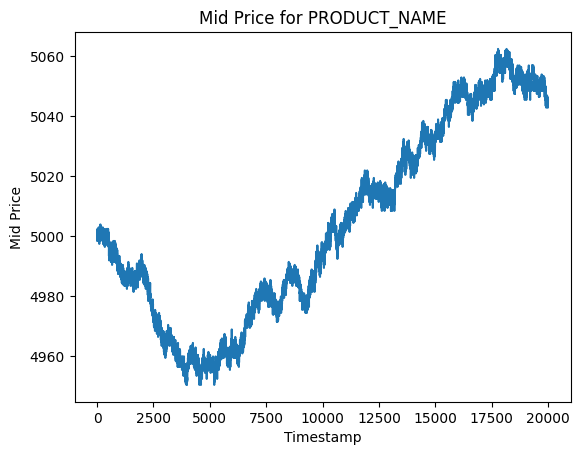

In [5]:
data[data['product'] == 'STARFRUIT']['mid_price'].plot()
plt.xlabel('Timestamp')
plt.ylabel('Mid Price')
plt.title('Mid Price for PRODUCT_NAME')
plt.show()


In [6]:
df_1 = data[data['product'] == 'STARFRUIT']

In [7]:
macd, macd_signal, macd_hist = talib.MACD(df_1['mid_price'])
df_1['macd'] = macd
df_1['macd_signal'] = macd_signal
df_1['macd_hist'] = macd_hist


C:\Users\ayush\AppData\Local\Temp\ipykernel_24332\3075745255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['macd'] = macd
C:\Users\ayush\AppData\Local\Temp\ipykernel_24332\3075745255.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['macd_signal'] = macd_signal
C:\Users\ayush\AppData\Local\Temp\ipykernel_24332\3075745255.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [8]:
def print_corrs(df, alphas, rets = ['ret_10', 'ret_30', 'ret_1', 'ret_5']):
# def print_corrs(df, alphas, rets = ['ret_10', 'ret_30', 'iv_10']):
# def print_corrs(df, alphas, rets = ['tick_10', 'tick_30', 'tick_60', 'tick_300']):
# def print_corrs(df, alphas, rets = ['ret_60', 'ret_300', 'iv_60']):
    msg = "                                      "
    for ret in rets:
        msg += f"{ret:>8s}"
    print(msg)
    for alpha in alphas:
        msg = f"{alpha:30s} corr -> "
        for ret in rets:
            msg += f"{df[alpha].corr(df[ret])*100:7.2f} "
        print(msg)
    print()

In [9]:
def print_buckets(df, alphas, rets = ['ret_10', 'ret_5', 'ret_30', 'ret_300'], aggfunc = ['mean', 'median', 'count']):
# def print_buckets(df, alphas, rets = ['ret_10', 'ret_30', 'iv_10'], aggfunc = ['mean', 'median', 'count']):
# def print_buckets(df, alphas, rets = ['tick_10', 'tick_30', 'tick_60', 'tick_300'], aggfunc = ['mean', 'median', 'count']):
# def print_buckets(df, alphas, rets = ['ret_60', 'ret_300', 'iv_60'], aggfunc = ['mean', 'median', 'count']):
    for alpha in alphas:
        msg = df.pivot_table(index = pd.qcut(df[alpha],5,duplicates='drop'), values=rets, aggfunc=aggfunc)
        print(msg)

In [10]:
def add_ret(df, periods = [1, 5, 10, 30, 60, 300]):
    for period in periods:
        df[f'ret_{period}'] = df['mid_price'].pct_change(period).shift(-period) * 1e4
    return df
df = add_ret(df_1)

C:\Users\ayush\AppData\Local\Temp\ipykernel_24332\3957114906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'ret_{period}'] = df['mid_price'].pct_change(period).shift(-period) * 1e4
C:\Users\ayush\AppData\Local\Temp\ipykernel_24332\3957114906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'ret_{period}'] = df['mid_price'].pct_change(period).shift(-period) * 1e4
C:\Users\ayush\AppData\Local\Temp\ipykernel_24332\3957114906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [11]:
print_corrs(df, ['macd', 'macd_signal', 'macd_hist'])

                                        ret_10  ret_30   ret_1   ret_5
macd                           corr ->  -10.68  -10.31  -13.46  -11.64 
macd_signal                    corr ->   -2.82   -4.48   -2.89   -2.54 
macd_hist                      corr ->  -22.96  -17.62  -30.69  -26.41 



In [12]:
print_buckets(df, ['macd', 'macd_signal', 'macd_hist'], rets=['ret_1', 'ret_5'], aggfunc=['mean'])

                      mean          
                     ret_1     ret_5
macd                                
(-1.454, -0.376]  0.704781  0.768456
(-0.376, -0.105]  0.229394  0.203080
(-0.105, 0.142]  -0.074262 -0.158614
(0.142, 0.448]   -0.187684 -0.066831
(0.448, 1.749]   -0.623554 -0.526016
                      mean          
                     ret_1     ret_5
macd_signal                         
(-1.192, -0.336]  0.183724  0.277072
(-0.336, -0.095]  0.042852 -0.047688
(-0.095, 0.13]   -0.050219 -0.001565
(0.13, 0.421]    -0.037479 -0.025150
(0.421, 1.51]    -0.090470  0.016148
                       mean          
                      ret_1     ret_5
macd_hist                            
(-0.539, -0.139]   1.511507  1.525438
(-0.139, -0.0427]  0.437507  0.350744
(-0.0427, 0.0377] -0.016962  0.021337
(0.0377, 0.137]   -0.469938 -0.426454
(0.137, 0.653]    -1.413809 -1.252220


In [13]:
def calculate_macd(df, fast_period=12, slow_period=26, signal_period=9):
    # Calculate the short-term exponential moving average (EMA)
    ema_fast = df['mid_price'].ewm(span=fast_period).mean()
    
    # Calculate the long-term exponential moving average (EMA)
    ema_slow = df['mid_price'].ewm(span=slow_period).mean()
    
    # Calculate the MACD line
    macd_line = ema_fast - ema_slow
    
    # Calculate the signal line
    signal_line = macd_line.ewm(span=signal_period).mean()
    
    # Calculate the MACD histogram
    macd_hist = macd_line - signal_line
    
    return macd_line, signal_line, macd_hist

macd, macd_signal, macd_hist = calculate_macd(df_1)
df_1['macd'] = macd
df_1['macd_signal'] = macd_signal
df_1['macd_hist'] = macd_hist


C:\Users\ayush\AppData\Local\Temp\ipykernel_24332\3816496489.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['macd'] = macd
C:\Users\ayush\AppData\Local\Temp\ipykernel_24332\3816496489.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['macd_signal'] = macd_signal
C:\Users\ayush\AppData\Local\Temp\ipykernel_24332\3816496489.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [14]:
from datamodel import Listing, Observation, Order, OrderDepth, ProsperityEncoder, Symbol, Trade, TradingState
from typing import List, Any 
import string
import json



class Trader:
    
    def compute_amethysts(self, product, order_depth, acc_bid, acc_ask):
        
        orders: list[Order] = []

        osell = collections.OrderedDict(sorted(order_depth.sell_orders.items()))
        obuy = collections.OrderedDict(sorted(order_depth.buy_orders.items(), reverse=True))

        sell_vol, best_sell_pr = self.values_extract(osell)
        buy_vol, best_buy_pr = self.values_extract(obuy, 1)

        cpos = self.position[product]

        mx_with_buy = -1

        for ask, vol in osell.items():
            if ((ask < acc_bid) or ((self.position[product]<0) and (ask == acc_bid))) and cpos < self.POSITION_LIMIT['PEARLS']:
                mx_with_buy = max(mx_with_buy, ask)
                order_for = min(-vol, self.POSITION_LIMIT['PEARLS'] - cpos)
                cpos += order_for
                assert(order_for >= 0)
                orders.append(Order(product, ask, order_for))

        mprice_actual = (
             + best_buy_pr)/2
        mprice_ours = (acc_bid+acc_ask)/2

        undercut_buy = best_buy_pr + 1
        undercut_sell = best_sell_pr - 1

        bid_pr = min(undercut_buy, acc_bid-1) # we will shift this by 1 to beat this price
        sell_pr = max(undercut_sell, acc_ask+1)

        if (cpos < self.POSITION_LIMIT['PEARLS']) and (self.position[product] < 0):
            num = min(40, self.POSITION_LIMIT['PEARLS'] - cpos)
            orders.append(Order(product, min(undercut_buy + 1, acc_bid-1), num))
            cpos += num

        if (cpos < self.POSITION_LIMIT['PEARLS']) and (self.position[product] > 15):
            num = min(40, self.POSITION_LIMIT['PEARLS'] - cpos)
            orders.append(Order(product, min(undercut_buy - 1, acc_bid-1), num))
            cpos += num

        if cpos < self.POSITION_LIMIT['PEARLS']:
            num = min(40, self.POSITION_LIMIT['PEARLS'] - cpos)
            orders.append(Order(product, bid_pr, num))
            cpos += num
        
        cpos = self.position[product]

        for bid, vol in obuy.items():
            if ((bid > acc_ask) or ((self.position[product]>0) and (bid == acc_ask))) and cpos > -self.POSITION_LIMIT['PEARLS']:
                order_for = max(-vol, -self.POSITION_LIMIT['PEARLS']-cpos)
                # order_for is a negative number denoting how much we will sell
                cpos += order_for
                assert(order_for <= 0)
                orders.append(Order(product, bid, order_for))

        if (cpos > -self.POSITION_LIMIT['PEARLS']) and (self.position[product] > 0):
            num = max(-40, -self.POSITION_LIMIT['PEARLS']-cpos)
            orders.append(Order(product, max(undercut_sell-1, acc_ask+1), num))
            cpos += num

        if (cpos > -self.POSITION_LIMIT['PEARLS']) and (self.position[product] < -15):
            num = max(-40, -self.POSITION_LIMIT['PEARLS']-cpos)
            orders.append(Order(product, max(undercut_sell+1, acc_ask+1), num))
            cpos += num

        if cpos > -self.POSITION_LIMIT['PEARLS']:
            num = max(-40, -self.POSITION_LIMIT['PEARLS']-cpos)
            orders.append(Order(product, sell_pr, num))
            cpos += num

        return orders
    
    def run(self, state: TradingState):
        # Only method required. It takes all buy and sell orders for all symbols as an input, and outputs a list of orders to be sent
        # print("traderData: " + state.traderData)
        # print("Observations: " + str(state.observations))
        result = {}
        conversions = 0
        trader_data = ""
        for product in state.order_depths:
            if product == "AMETHYSTS":
                order_depth: OrderDepth = state.order_depths[product]
                orders: List[Order] = []
                acceptable_price = 10000;  # Participant should calculate this value
                print("Acceptable price : " + str(acceptable_price))
                print("Buy Order depth : " + str(len(order_depth.buy_orders)) + ", Sell order depth : " + str(len(order_depth.sell_orders)))
        
                if len(order_depth.sell_orders) != 0:
                    best_ask, best_ask_amount = list(order_depth.sell_orders.items())[0]
                    if int(best_ask) < acceptable_price - 1:
                        print("BUY", str(-best_ask_amount) + "x", best_ask)
                        orders.append(Order(product, best_ask, -best_ask_amount))
        
                if len(order_depth.buy_orders) != 0:
                    best_bid, best_bid_amount = list(order_depth.buy_orders.items())[0]
                    if int(best_bid) > acceptable_price + 1 :
                        print("SELL", str(best_bid_amount) + "x", best_bid)
                        orders.append(Order(product, best_bid, -best_bid_amount))
                
                result[product] = orders
        
        
        traderData = "SAMPLE" # String value holding Trader state data required. It will be delivered as TradingState.traderData on next execution.
            
        conversions = 1
        logger.flush(state, result, conversions, trader_data)

        return result, conversions, traderData

In [ ]:
def compute_orders_pearls(self, product, order_depth, acc_bid, acc_ask):
        orders: list[Order] = []

        osell = collections.OrderedDict(sorted(order_depth.sell_orders.items()))
        obuy = collections.OrderedDict(sorted(order_depth.buy_orders.items(), reverse=True))

        sell_vol, best_sell_pr = self.values_extract(osell)
        buy_vol, best_buy_pr = self.values_extract(obuy, 1)

        cpos = self.position[product]

        mx_with_buy = -1

        for ask, vol in osell.items():
            if ((ask < acc_bid) or ((self.position[product]<0) and (ask == acc_bid))) and cpos < self.POSITION_LIMIT['PEARLS']:
                mx_with_buy = max(mx_with_buy, ask)
                order_for = min(-vol, self.POSITION_LIMIT['PEARLS'] - cpos)
                cpos += order_for
                assert(order_for >= 0)
                orders.append(Order(product, ask, order_for))

        mprice_actual = (
             + best_buy_pr)/2
        mprice_ours = (acc_bid+acc_ask)/2

        undercut_buy = best_buy_pr + 1
        undercut_sell = best_sell_pr - 1

        bid_pr = min(undercut_buy, acc_bid-1) # we will shift this by 1 to beat this price
        sell_pr = max(undercut_sell, acc_ask+1)

        if (cpos < self.POSITION_LIMIT['PEARLS']) and (self.position[product] < 0):
            num = min(40, self.POSITION_LIMIT['PEARLS'] - cpos)
            orders.append(Order(product, min(undercut_buy + 1, acc_bid-1), num))
            cpos += num

        if (cpos < self.POSITION_LIMIT['PEARLS']) and (self.position[product] > 15):
            num = min(40, self.POSITION_LIMIT['PEARLS'] - cpos)
            orders.append(Order(product, min(undercut_buy - 1, acc_bid-1), num))
            cpos += num

        if cpos < self.POSITION_LIMIT['PEARLS']:
            num = min(40, self.POSITION_LIMIT['PEARLS'] - cpos)
            orders.append(Order(product, bid_pr, num))
            cpos += num
        
        cpos = self.position[product]

        for bid, vol in obuy.items():
            if ((bid > acc_ask) or ((self.position[product]>0) and (bid == acc_ask))) and cpos > -self.POSITION_LIMIT['PEARLS']:
                order_for = max(-vol, -self.POSITION_LIMIT['PEARLS']-cpos)
                # order_for is a negative number denoting how much we will sell
                cpos += order_for
                assert(order_for <= 0)
                orders.append(Order(product, bid, order_for))

        if (cpos > -self.POSITION_LIMIT['PEARLS']) and (self.position[product] > 0):
            num = max(-40, -self.POSITION_LIMIT['PEARLS']-cpos)
            orders.append(Order(product, max(undercut_sell-1, acc_ask+1), num))
            cpos += num

        if (cpos > -self.POSITION_LIMIT['PEARLS']) and (self.position[product] < -15):
            num = max(-40, -self.POSITION_LIMIT['PEARLS']-cpos)
            orders.append(Order(product, max(undercut_sell+1, acc_ask+1), num))
            cpos += num

        if cpos > -self.POSITION_LIMIT['PEARLS']:
            num = max(-40, -self.POSITION_LIMIT['PEARLS']-cpos)
            orders.append(Order(product, sell_pr, num))
            cpos += num

        return orders

In [ ]:
def run(self, state: TradingState) -> Dict[str, List[Order]]:
        """
        Only method required. It takes all buy and sell orders for all symbols as an input,
        and outputs a list of orders to be sent
        """
        # Initialize the method output dict as an empty dict
        result = {'PEARLS' : [], 'BANANAS' : [], 'COCONUTS' : [], 'PINA_COLADAS' : [], 'DIVING_GEAR' : [], 'BERRIES' : [], 'DIP' : [], 'BAGUETTE' : [], 'UKULELE' : [], 'PICNIC_BASKET' : []}

        # Iterate over all the keys (the available products) contained in the order dephts
        for key, val in state.position.items():
            self.position[key] = val
        print()
        for key, val in self.position.items():
            print(f'{key} position: {val}')

        assert abs(self.position.get('UKULELE', 0)) <= self.POSITION_LIMIT['UKULELE']

        timestamp = state.timestamp

        if len(self.bananas_cache) == self.bananas_dim:
            self.bananas_cache.pop(0)
        if len(self.coconuts_cache) == self.coconuts_dim:
            self.coconuts_cache.pop(0)

        _, bs_bananas = self.values_extract(collections.OrderedDict(sorted(state.order_depths['BANANAS'].sell_orders.items())))
        _, bb_bananas = self.values_extract(collections.OrderedDict(sorted(state.order_depths['BANANAS'].buy_orders.items(), reverse=True)), 1)

        self.bananas_cache.append((bs_bananas+bb_bananas)/2)

        INF = 1e9
    
        bananas_lb = -INF
        bananas_ub = INF

        if len(self.bananas_cache) == self.bananas_dim:
            bananas_lb = self.calc_next_price_bananas()-1
            bananas_ub = self.calc_next_price_bananas()+1

        pearls_lb = 10000
        pearls_ub = 10000

        # CHANGE FROM HERE

        acc_bid = {'PEARLS' : pearls_lb, 'BANANAS' : bananas_lb} # we want to buy at slightly below
        acc_ask = {'PEARLS' : pearls_ub, 'BANANAS' : bananas_ub} # we want to sell at slightly above

        self.steps += 1

        for product in state.market_trades.keys():
            for trade in state.market_trades[product]:
                if trade.buyer == trade.seller:
                    continue
                self.person_position[trade.buyer][product] = 1.5
                self.person_position[trade.seller][product] = -1.5
                self.person_actvalof_position[trade.buyer][product] += trade.quantity
                self.person_actvalof_position[trade.seller][product] += -trade.quantity

        orders = self.compute_orders_c_and_pc(state.order_depths)
        result['PINA_COLADAS'] += orders['PINA_COLADAS']
        result['COCONUTS'] += orders['COCONUTS']
        orders = self.compute_orders_dg(state.order_depths, state.observations)
        result['DIVING_GEAR'] += orders['DIVING_GEAR']
        orders = self.compute_orders_br(state.order_depths, state.timestamp)
        result['BERRIES'] += orders['BERRIES']

        orders = self.compute_orders_basket(state.order_depths)
        result['PICNIC_BASKET'] += orders['PICNIC_BASKET']
        result['DIP'] += orders['DIP']
        result['BAGUETTE'] += orders['BAGUETTE']
        result['UKULELE'] += orders['UKULELE']

        for product in ['PEARLS', 'BANANAS']:
            order_depth: OrderDepth = state.order_depths[product]
            orders = self.compute_orders(product, order_depth, acc_bid[product], acc_ask[product])
            result[product] += orders

        for product in state.own_trades.keys():
            for trade in state.own_trades[product]:
                if trade.timestamp != state.timestamp-100:
                    continue
                # print(f'We are trading {product}, {trade.buyer}, {trade.seller}, {trade.quantity}, {trade.price}')
                self.volume_traded[product] += abs(trade.quantity)
                if trade.buyer == "SUBMISSION":
                    self.cpnl[product] -= trade.quantity * trade.price
                else:
                    self.cpnl[product] += trade.quantity * trade.price

        totpnl = 0

        for product in state.order_depths.keys():
            settled_pnl = 0
            best_sell = min(state.order_depths[product].sell_orders.keys())
            best_buy = max(state.order_depths[product].buy_orders.keys())

            if self.position[product] < 0:
                settled_pnl += self.position[product] * best_buy
            else:
                settled_pnl += self.position[product] * best_sell
            totpnl += settled_pnl + self.cpnl[product]
            print(f"For product {product}, {settled_pnl + self.cpnl[product]}, {(settled_pnl+self.cpnl[product])/(self.volume_traded[product]+1e-20)}")

        for person in self.person_position.keys():
            for val in self.person_position[person].keys():
                
                if person == 'Olivia':
                    self.person_position[person][val] *= 0.995
                if person == 'Pablo':
                    self.person_position[person][val] *= 0.8
                if person == 'Camilla':
                    self.person_position[person][val] *= 0

        print(f"Timestamp {timestamp}, Total PNL ended up being {totpnl}")
        # print(f'Will trade {result}')
        print("End transmission")
                
        return result